In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
print('Success')

Success


# <span style='color:Red'> Data Analyzing </span>

In [3]:
data=pd.read_csv('shanghai_ranking_2024.csv')
data.head(5)

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6
3,4,University of Cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6
4,5,"University of California, Berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5


In [4]:
columns=data.columns
columns

Index(['Rank', 'University_Name', 'National/Regional Rank', 'Alumni', 'Award',
       'Hici', 'N&S', 'PUB', 'PCP'],
      dtype='object')

In [13]:
data.shape

(1000, 9)

In [22]:
columns=data.columns.tolist()
columns

['Rank',
 'University_Name',
 'National/Regional Rank',
 'Alumni',
 'Award',
 'Hici',
 'N&S',
 'PUB',
 'PCP']

In [26]:
data.nunique()

Rank                        87
University_Name           1000
National/Regional Rank     130
Alumni                      57
Award                       75
Hici                        59
N&S                        259
PUB                        416
PCP                        267
dtype: int64

In [9]:
data.describe()

,Alumni,Award,Hici,N&S,PUB,PCP
count,1000.000000,1000.00000,1000.000000,989.000000,1000.000000,1000.000000
mean,4.509600,3.78120,10.734400,10.575126,35.113000,19.655300
std,10.103201,11.45538,10.949265,10.637247,13.684495,8.800436
min,0.000000,0.00000,0.000000,0.000000,9.300000,8.600000
25%,0.000000,0.00000,0.000000,3.900000,25.775000,14.100000
50%,0.000000,0.00000,9.200000,7.300000,31.700000,17.600000
75%,0.000000,0.00000,14.600000,13.300000,41.425000,23.000000
max,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1000 non-null   object 
 1   University_Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Alumni                  1000 non-null   float64
 4   Award                   1000 non-null   float64
 5   Hici                    1000 non-null   float64
 6   N&S                     989 non-null    float64
 7   PUB                     1000 non-null   float64
 8   PCP                     1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [14]:
data.isnull().sum()

Rank                       0
University_Name            0
National/Regional Rank     0
Alumni                     0
Award                      0
Hici                       0
N&S                       11
PUB                        0
PCP                        0
dtype: int64

#### <span style='color:Green'>So, we can see that there is missing values in N&S columns </span>

In [16]:
data['N&S'].head()

0    100.0
1     83.9
2     70.8
3     59.8
4     62.8
Name: N&S, dtype: float64

We can say that the there are float values in the columns

In [17]:
data['N&S'].nunique()

259

Here we can see that there is more unique numbers, and less repeating numbers

# <span style='color:Orange'>Conditions for replacing values </span>
### <span style='color:Green'>1. Drop The Values </span>
        We can just drop the rows if we encounter a less number of missing values
### <span style='color:Green'>2. Mean (Average)</span>
        The mean is the most appropriate when the data is normally distrubuted (symmetrical, bell-shaped distribution) without significant outliers.
        If the data points are roughly evenly spread, the mean gives a good measure of cnetral tendency. 
        Use the mean when:
            1. Data is continuous.
            2. Distribution is symmetrical
            3. No extreme outliers or skewness are present
### <span style='color:Green'>3. Conditions for replacing values </span>
        The median is the preferred measure of central tendency when the data is skwewd or has outliers that could distort the mean.
        Use the median when:
            1. The data is skewed (Positively or Negatively)
            2. There are extreme outliers that could heavily influence the mean.
            3. You want a measure that represent the middel of the data regardless of outliers.


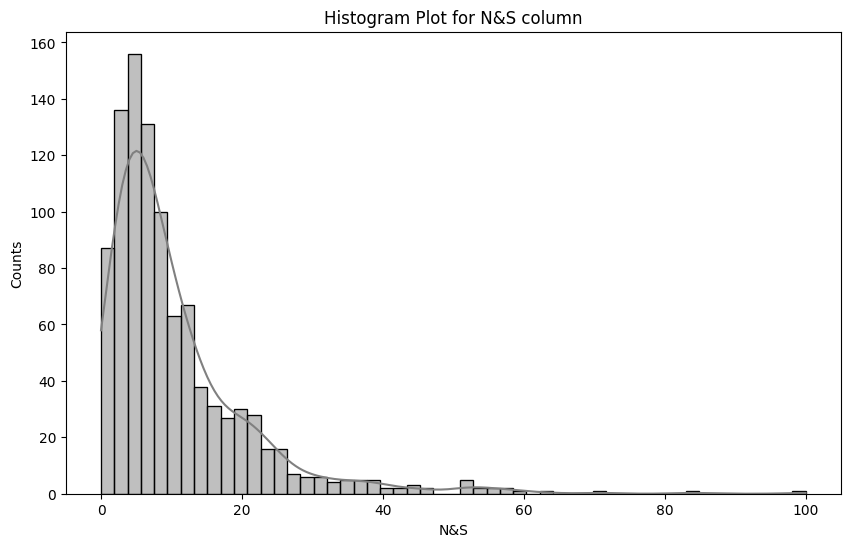

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['N&S'], color='Grey', kde=True)
plt.title('Histogram Plot for N&S column')
plt.xlabel('N&S')
plt.ylabel('Counts')
plt.show()

#### Conclusion:
We can see that the columns is not symmetrical and it is not continous either, it is a right skewed data.
So, we can use median to replace the missing values.

In [30]:
median_ns = data['N&S'].median()
median_ns

7.3

In [31]:
data['N&S'].fillna(median_ns, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3096\775157310.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['N&S'].fillna(median_ns, inplace=True)


#### So, we filled the non values
lets again check the distrubution

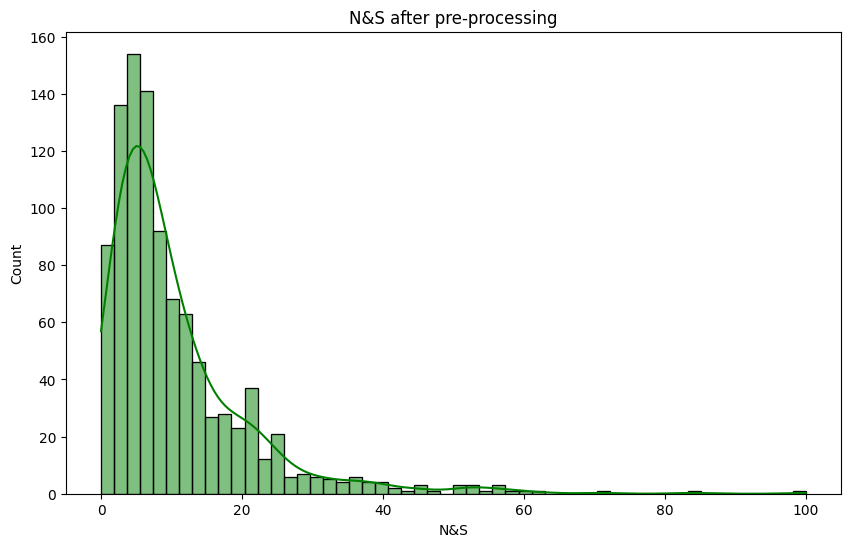

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['N&S'], color='Green', kde=True)
plt.title('N&S after pre-processing')
plt.xlabel('N&S')
plt.ylabel('Count')
plt.show()

In [36]:
print(f"So, there is now {data['N&S'].isnull().sum()} missing values in N&S columns")

So, there is now 0 missing values in N&S columns


In [37]:
data.isnull().sum()

Rank                      0
University_Name           0
National/Regional Rank    0
Alumni                    0
Award                     0
Hici                      0
N&S                       0
PUB                       0
PCP                       0
dtype: int64

#### So, there is no missing values in the data anymore

# <span style='color:Purple'>DATA VIZUALIZATION</span>


In [38]:
columns

['Rank',
 'University_Name',
 'National/Regional Rank',
 'Alumni',
 'Award',
 'Hici',
 'N&S',
 'PUB',
 'PCP']

In [57]:
data.University_Name.value_counts()

University_Name
Harvard University                    1
Ural Federal University               1
University of Haifa                   1
Università Della Svizzera Italiana    1
Manchester Metropolitan University    1
                                     ..
University of Miami                   1
James Cook University                 1
University of Wollongong              1
Cairo University                      1
Abdul Wali Khan University Mardan     1
Name: count, Length: 1000, dtype: int64

In [49]:
data.head(10)

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6
3,4,University of Cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6
4,5,"University of California, Berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5
5,6,University of Oxford,2,49.5,59.7,51.3,57.2,77.1,47.9
6,7,Princeton University,5,61.2,100.0,26.0,51.3,42.3,75.3
7,8,California Institute of Technology,6-7,55.7,63.4,29.8,57.9,41.0,100.0
8,8,Columbia University,6-7,59.4,63.2,42.7,51.9,67.0,31.6
9,10,University of Chicago,8,59.0,84.5,32.5,44.9,53.0,44.2


C:\Users\HP\AppData\Local\Temp\ipykernel_3096\4215641791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=topu, x='University_Name', y='Alumni', palette='husl')


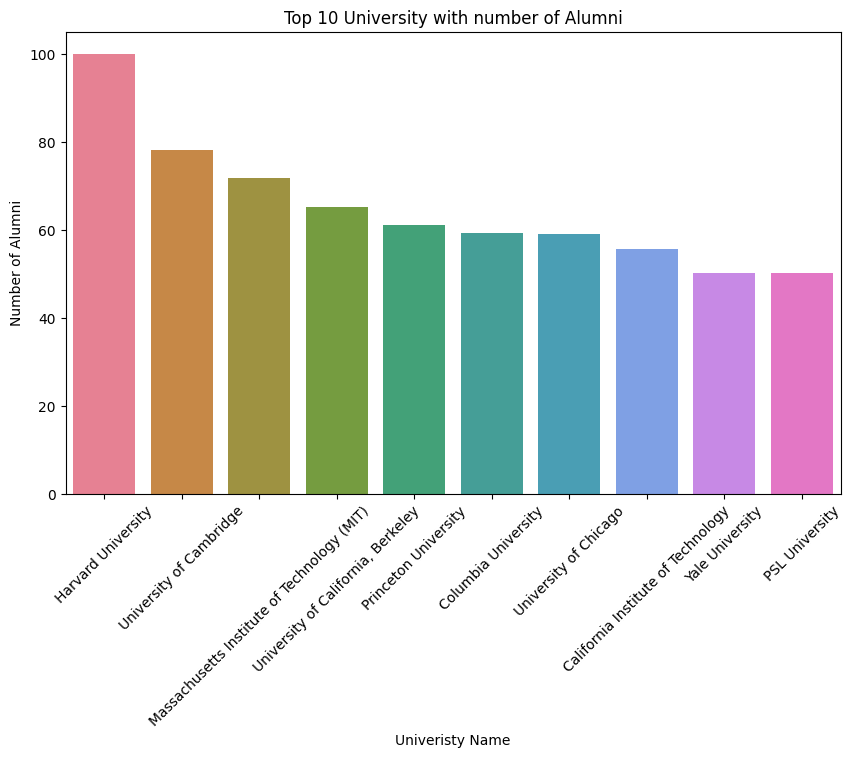

In [76]:
plt.figure(figsize=(10,6))
topu=data.nlargest(10, 'Alumni')
sns.barplot(data=topu, x='University_Name', y='Alumni', palette='husl')
plt.title('Top 10 University with number of Alumni')
plt.xlabel('Univeristy Name')
plt.ylabel('Number of Alumni')
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3096\2455226886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=topAwa, x='University_Name', y='Award', palette='husl')


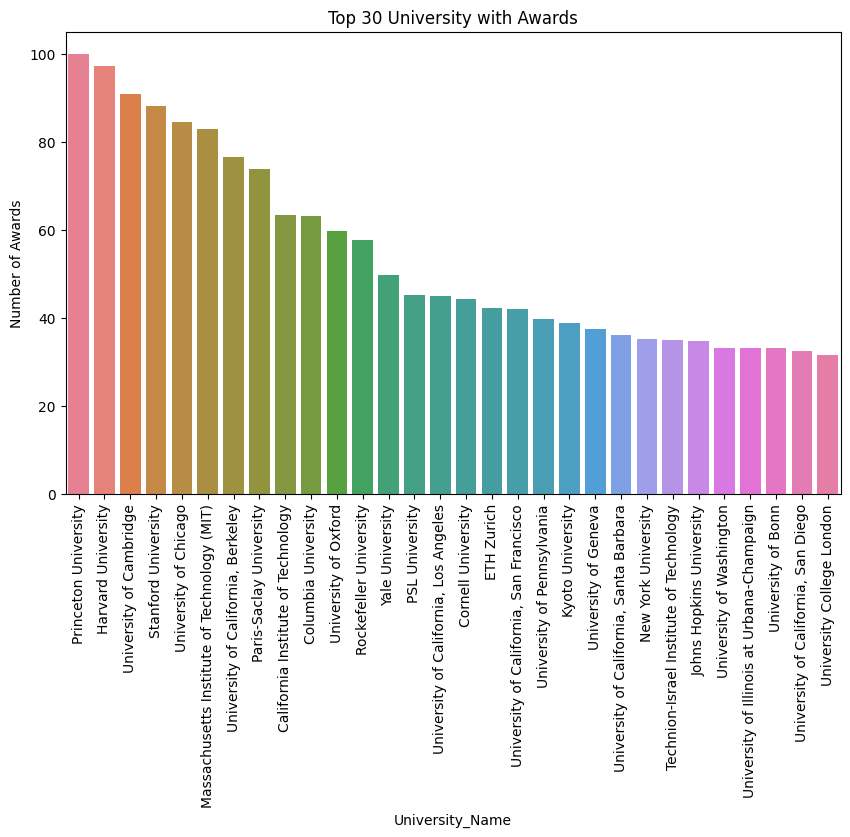

In [81]:
topAwa=data.nlargest(30, 'Award')
plt.figure(figsize=(10,6))
sns.barplot(data=topAwa, x='University_Name', y='Award', palette='husl')
plt.title('Top 30 University with Awards')
plt.xlabel('University_Name')
plt.ylabel('Number of Awards')
plt.xticks(rotation=90)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3096\3886627025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hici, x='University_Name', y='Hici', palette='husl')


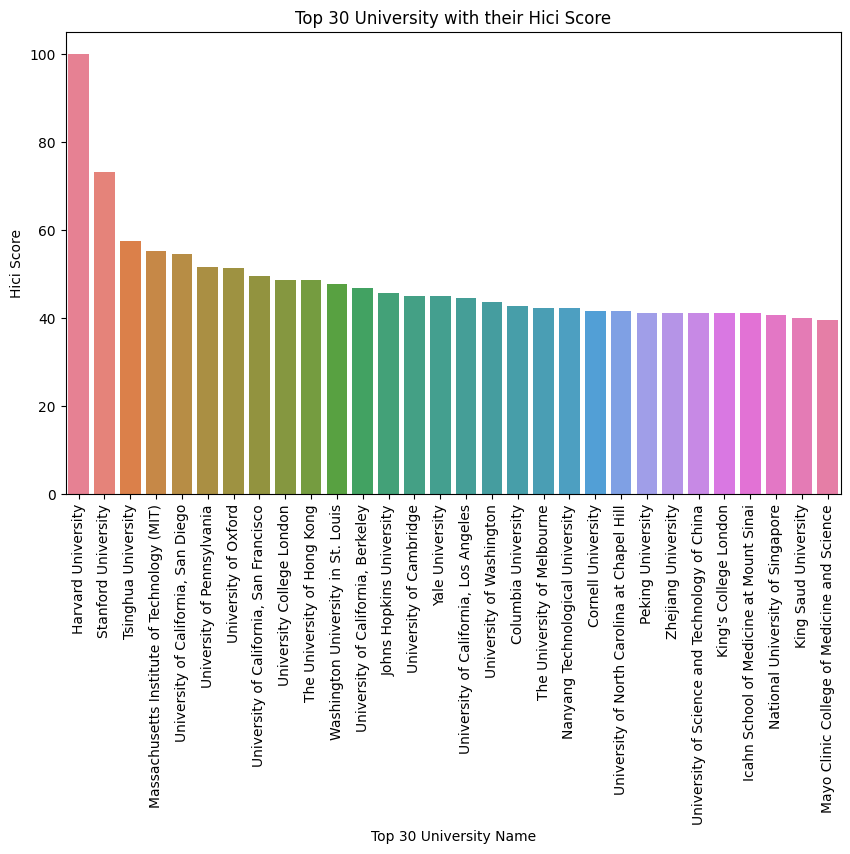

In [84]:
top_hici=data.nlargest(30, 'Hici')
plt.figure(figsize=(10,6))
sns.barplot(data=top_hici, x='University_Name', y='Hici', palette='husl')
plt.title('Top 30 University with their Hici Score')
plt.xlabel('Top 30 University Name')
plt.ylabel('Hici Score')
plt.xticks(rotation=90)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3096\2609968214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hici, x='University_Name', y='N&S', palette='husl')


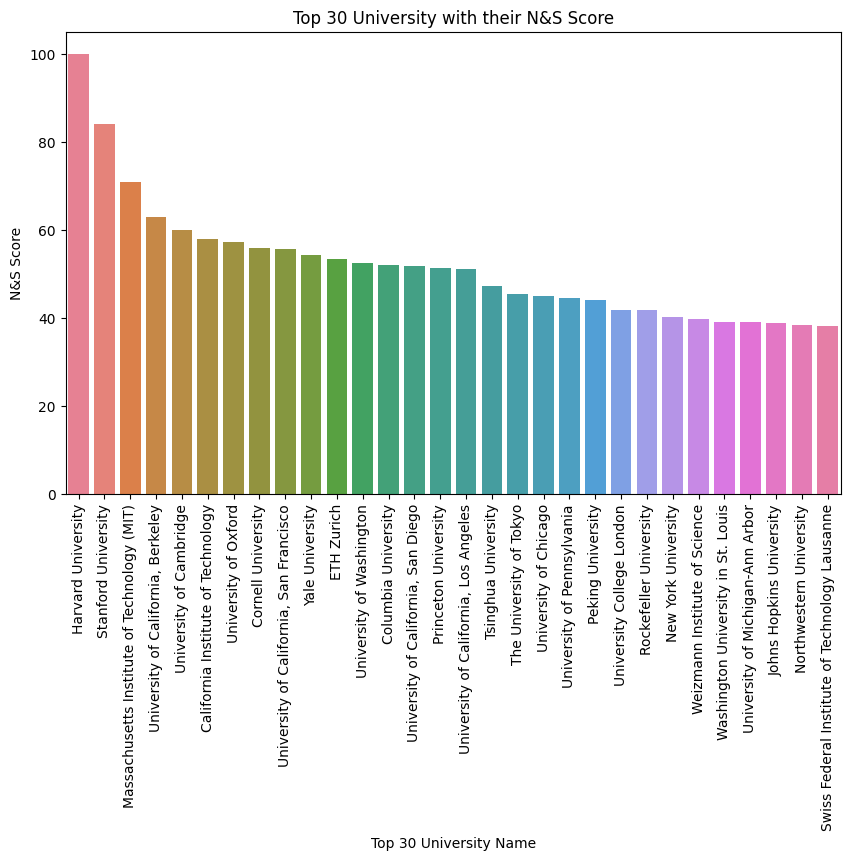

In [86]:
top_hici=data.nlargest(30, 'N&S')
plt.figure(figsize=(10,6))
sns.barplot(data=top_hici, x='University_Name', y='N&S', palette='husl')
plt.title('Top 30 University with their N&S Score')
plt.xlabel('Top 30 University Name')
plt.ylabel('N&S Score')
plt.xticks(rotation=90)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3096\3724362681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hici, x='University_Name', y='PUB', palette='husl')


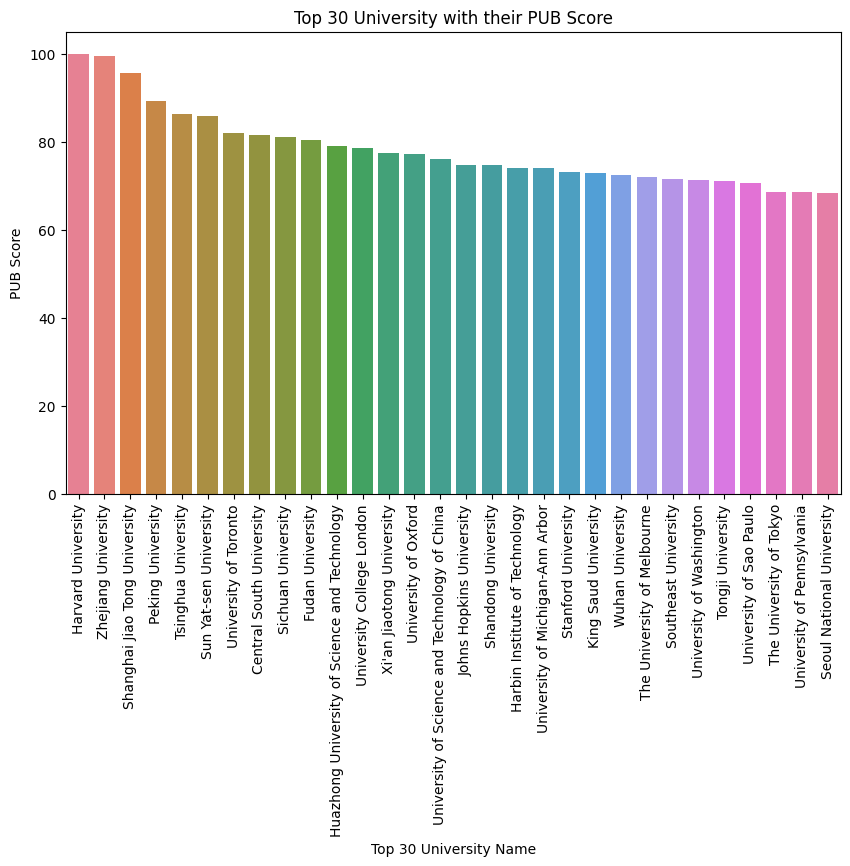

In [87]:
top_hici=data.nlargest(30, 'PUB')
plt.figure(figsize=(10,6))
sns.barplot(data=top_hici, x='University_Name', y='PUB', palette='husl')
plt.title('Top 30 University with their PUB Score')
plt.xlabel('Top 30 University Name')
plt.ylabel('PUB Score')
plt.xticks(rotation=90)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3096\2336320741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hici, x='University_Name', y='PCP', palette='husl')


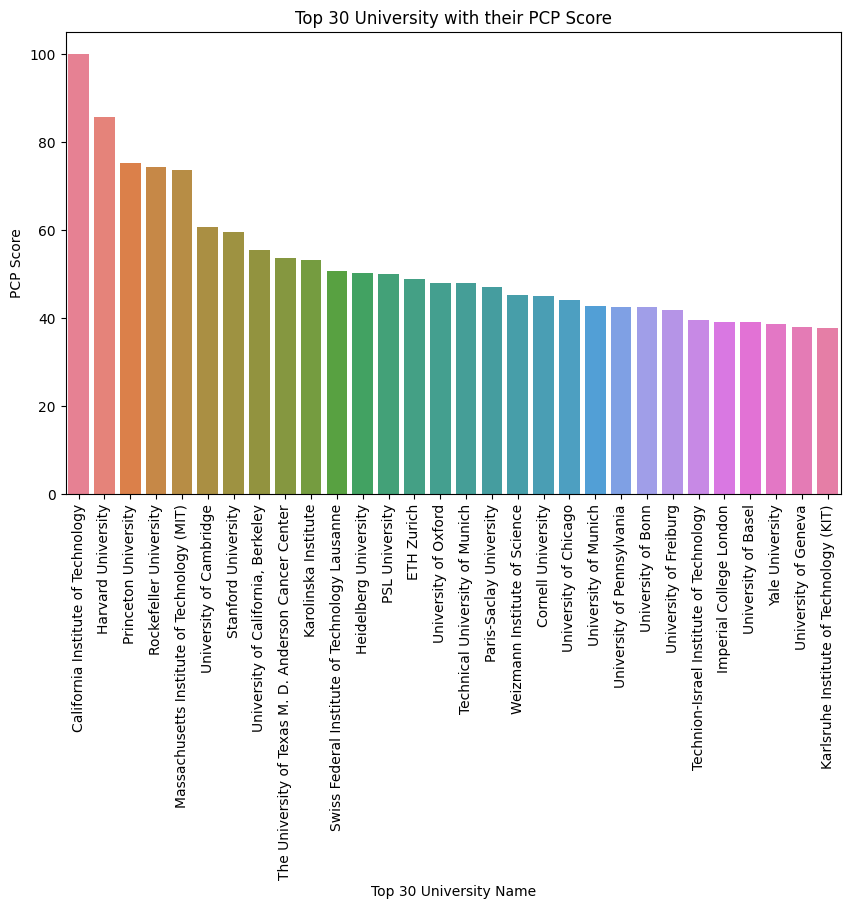

In [88]:
top_hici=data.nlargest(30, 'PCP')
plt.figure(figsize=(10,6))
sns.barplot(data=top_hici, x='University_Name', y='PCP', palette='husl')
plt.title('Top 30 University with their PCP Score')
plt.xlabel('Top 30 University Name')
plt.ylabel('PCP Score')
plt.xticks(rotation=90)
plt.show()

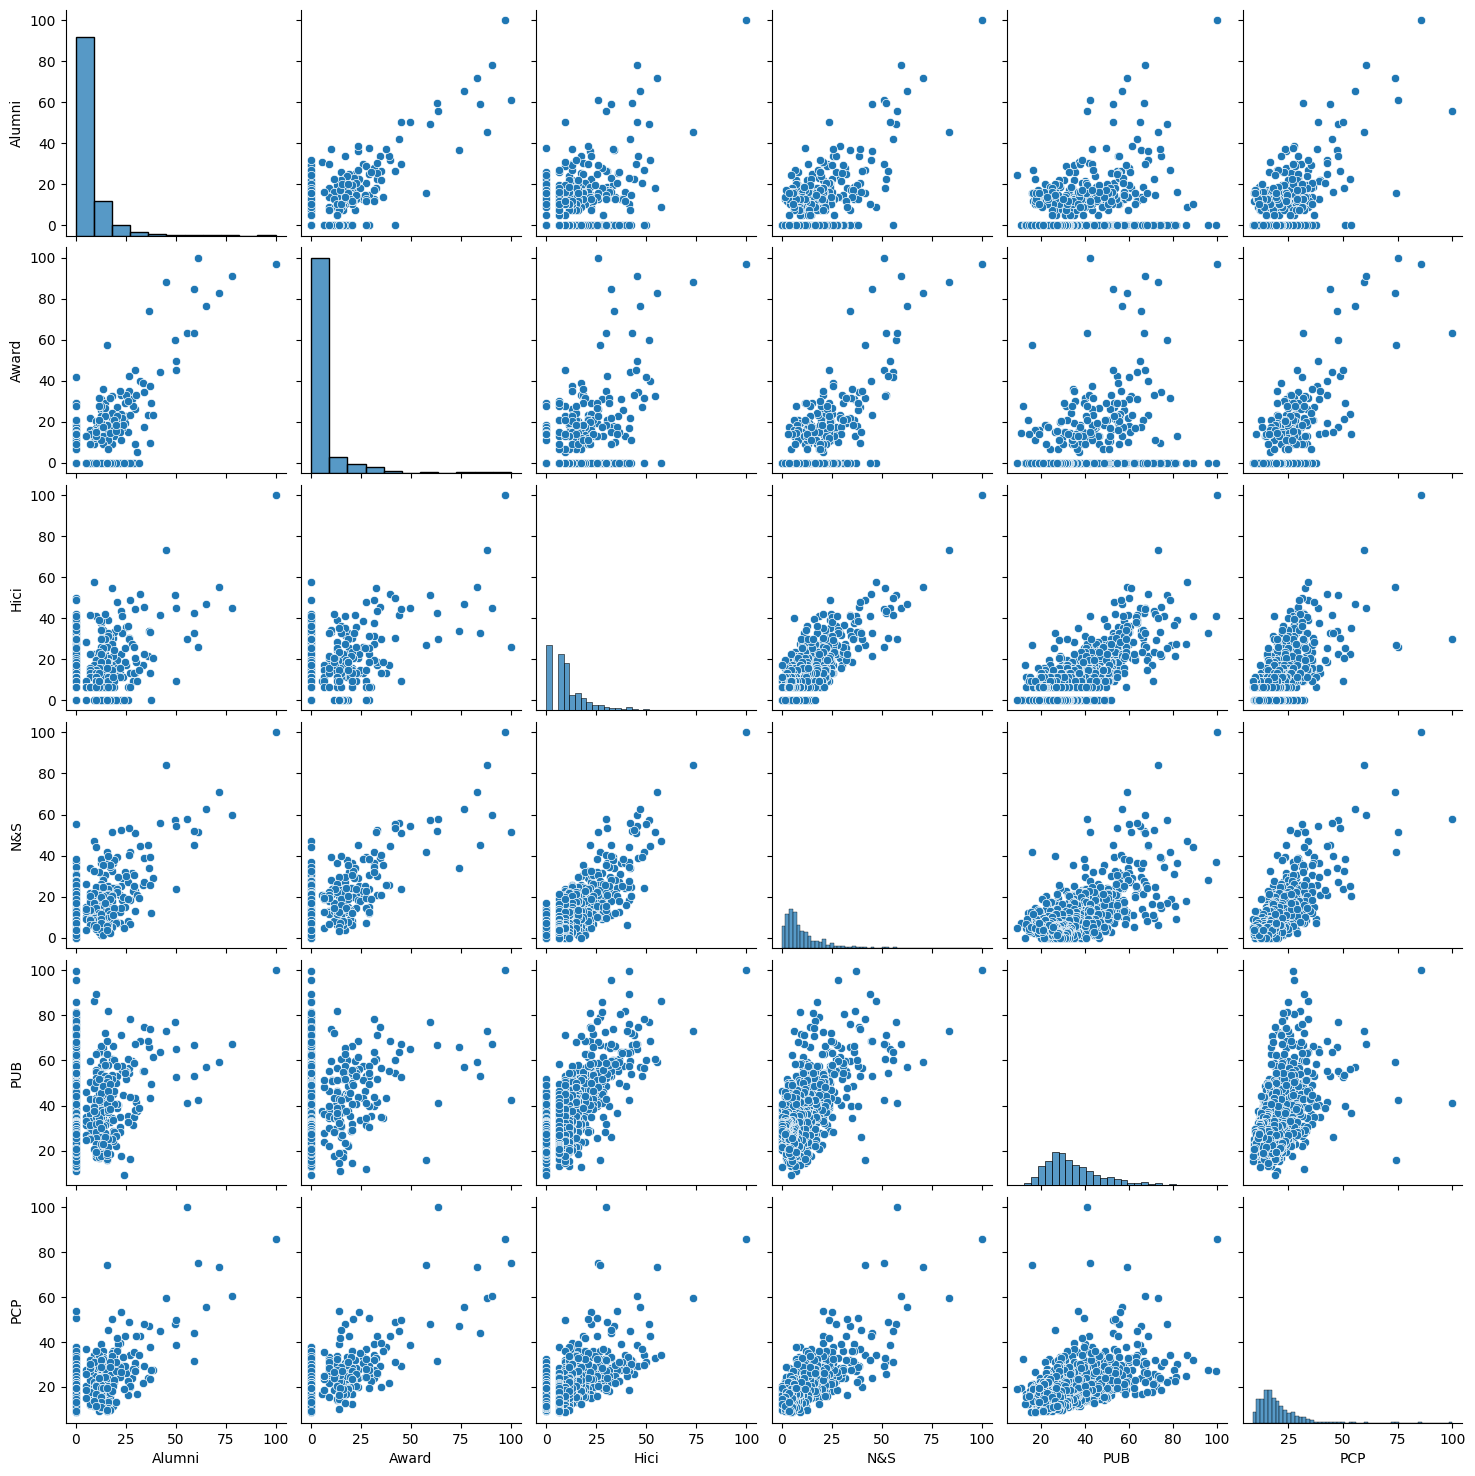

In [89]:
sns.pairplot(data=data)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1000 non-null   object 
 1   University_Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Alumni                  1000 non-null   float64
 4   Award                   1000 non-null   float64
 5   Hici                    1000 non-null   float64
 6   N&S                     1000 non-null   float64
 7   PUB                     1000 non-null   float64
 8   PCP                     1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [95]:
float_cols = data.select_dtypes(include='float64')
float_cols

,Alumni,Award,Hici,N&S,PUB,PCP
0,100.0,97.1,100.0,100.0,100.0,85.7
1,45.3,88.1,73.1,83.9,73.1,59.6
2,71.9,82.8,55.2,70.8,59.1,73.6
3,78.2,90.8,45.1,59.8,67.2,60.6
4,65.3,76.5,46.9,62.8,57.1,55.5
...,...,...,...,...,...,...
995,0.0,0.0,6.5,4.0,21.1,9.5
996,0.0,0.0,0.0,1.4,27.5,11.7
997,0.0,0.0,6.5,3.5,19.0,13.3
998,0.0,0.0,0.0,6.9,19.3,19.4


In [98]:
corr = float_cols.corr()
corr

,Alumni,Award,Hici,N&S,PUB,PCP
Alumni,1.000000,0.785131,0.485946,0.707330,0.380827,0.624922
Award,0.785131,1.000000,0.542474,0.746370,0.375987,0.679825
Hici,0.485946,0.542474,1.000000,0.788398,0.712207,0.646556
N&S,0.707330,0.746370,0.788398,1.000000,0.631984,0.759218
PUB,0.380827,0.375987,0.712207,0.631984,1.000000,0.464444
PCP,0.624922,0.679825,0.646556,0.759218,0.464444,1.000000


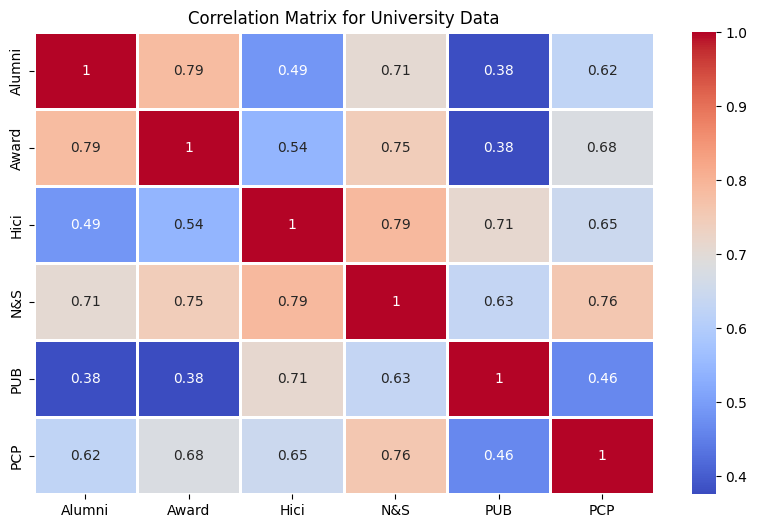

In [99]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', linewidth=1.0, annot=True)
plt.title('Correlation Matrix for University Data')
plt.show()